# 🧠 Mini Project: “Geometric Shape Detection Using Hough Transform”
## 🎯 Objective

To implement and demonstrate the use of the Hough Transform and its variants for detecting lines, circles, and ellipses in digital images, and to analyze accuracy, robustness, and speed using Python and OpenCV.

## 🧩 Topics Covered
| No. | Concept                            | Technique / Function                                                           |
| :-- | :--------------------------------- | :----------------------------------------------------------------------------- |
| 1   | Line Detection                     | Standard & Probabilistic Hough Transform (`cv2.HoughLines`, `cv2.HoughLinesP`) |
| 2   | Foot-of-Normal & Line Localization | Conversion from polar (ρ, θ) to Cartesian form                                 |
| 3   | Line Fitting                       | `cv2.fitLine()`                                                                |
| 4   | RANSAC for Line Detection          | `skimage.measure.ransac` with `LineModelND`                                    |
| 5   | Circular Object Detection          | `cv2.HoughCircles()`                                                           |
| 6   | Accurate Center Localization       | Circle parameter refinement                                                    |
| 7   | Speed Problem                      | Timing comparison of Hough vs RANSAC                                           |
| 8   | Ellipse Detection                  | `cv2.fitEllipse()`                                                             |
| 9   | Case Study – Human Iris Detection  | Detect circle (iris) from eye image                                            |
| 10  | Hole Detection                     | Circular Hough transform in binary images                                      |
| 11  | Generalized Hough Transform (GHT)  | Conceptual example using OpenCV GHT interface                                  |
| 12  | Spatial Matched Filtering          | Template matching using `cv2.matchTemplate()`                                  |
| 13  | GHT for Ellipse / Object Detection | Shape-based matching (concept + optional demo)                                 |
| 14  | GHT for Feature Collation          | Combining multiple detections                                                  |

## 🔧 Requirements
``` bash
pip install opencv-python scikit-image numpy matplotlib
```

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import LineModelND, ransac
import time

(np.float64(-0.5), np.float64(1178.5), np.float64(2200.5), np.float64(-0.5))

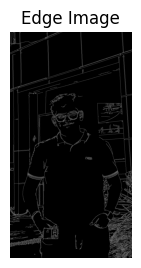

In [3]:
# Load image (grayscale)
img = cv2.imread('dataset/SatvikCasualPic.jpeg', cv2.IMREAD_GRAYSCALE)
if img is None:
    raise ValueError("Please place 'shapes_lines_circles.png' in the same folder!")

edges = cv2.Canny(img, 50, 150)
plt.figure(figsize=(14, 10))
plt.subplot(3, 4, 1)
plt.imshow(edges, cmap='gray')
plt.title('Edge Image')
plt.axis('off')

(np.float64(-0.5), np.float64(1178.5), np.float64(2200.5), np.float64(-0.5))

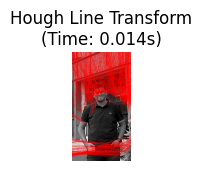

In [4]:
# 1️⃣ Hough Line Detection (Standard)
start = time.time()
lines = cv2.HoughLines(edges, 1, np.pi / 180, 120)
end = time.time()

line_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
if lines is not None:
    for rho, theta in lines[:,0]:
        a, b = np.cos(theta), np.sin(theta)
        x0, y0 = a*rho, b*rho
        x1, y1 = int(x0 + 1000*(-b)), int(y0 + 1000*(a))
        x2, y2 = int(x0 - 1000*(-b)), int(y0 - 1000*(a))
        cv2.line(line_img, (x1,y1), (x2,y2), (0,0,255), 1)
plt.subplot(3, 4, 2)
plt.imshow(line_img[..., ::-1])
plt.title(f'Hough Line Transform\n(Time: {end-start:.3f}s)')
plt.axis('off')

(np.float64(-0.5), np.float64(1178.5), np.float64(2200.5), np.float64(-0.5))

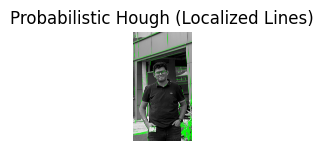

In [5]:
# 2️⃣ Probabilistic Hough Transform (line localization)
linesP = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=50, maxLineGap=10)
prob_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
for l in linesP:
    x1,y1,x2,y2 = l[0]
    cv2.line(prob_img,(x1,y1),(x2,y2),(0,255,0),2)
plt.subplot(3, 4, 3)
plt.imshow(prob_img[..., ::-1])
plt.title('Probabilistic Hough (Localized Lines)')
plt.axis('off')

/var/folders/4l/zg07xh_s7hxgk50cmtn9dvtr0000gp/T/ipykernel_3846/2262925026.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x1 = int(((y1 - y0) * vx / vy) + x0)
/var/folders/4l/zg07xh_s7hxgk50cmtn9dvtr0000gp/T/ipykernel_3846/2262925026.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x2 = int(((y2 - y0) * vx / vy) + x0)


(np.float64(-0.5), np.float64(1178.5), np.float64(2200.5), np.float64(-0.5))

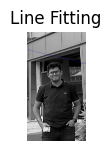

In [6]:
# 3️⃣ Line Fitting
points = np.column_stack(np.where(edges > 0))
[vx, vy, x0, y0] = cv2.fitLine(points, cv2.DIST_L2, 0, 0.01, 0.01)
fit_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
y1, y2 = 0, img.shape[0]
x1 = int(((y1 - y0) * vx / vy) + x0)
x2 = int(((y2 - y0) * vx / vy) + x0)
cv2.line(fit_img, (x1,y1), (x2,y2), (255,0,0), 2)
plt.subplot(3, 4, 4)
plt.imshow(fit_img[..., ::-1])
plt.title('Line Fitting')
plt.axis('off')

/Users/satvik.sawhney/Downloads/SRM/Computer Vision/.venv/lib/python3.11/site-packages/skimage/measure/fit.py:127: RuntimeWarning: divide by zero encountered in matmul
  res = (data - origin) - ((data - origin) @ direction)[
/Users/satvik.sawhney/Downloads/SRM/Computer Vision/.venv/lib/python3.11/site-packages/skimage/measure/fit.py:127: RuntimeWarning: overflow encountered in matmul
  res = (data - origin) - ((data - origin) @ direction)[
/Users/satvik.sawhney/Downloads/SRM/Computer Vision/.venv/lib/python3.11/site-packages/skimage/measure/fit.py:127: RuntimeWarning: invalid value encountered in matmul
  res = (data - origin) - ((data - origin) @ direction)[


(np.float64(-0.5), np.float64(1178.5), np.float64(2200.5), np.float64(-0.5))

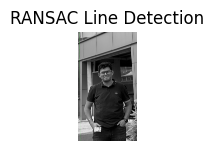

In [7]:
# 4️⃣ RANSAC for Line Detection
ransac_model, inliers = ransac(points, LineModelND, min_samples=2, residual_threshold=2, max_trials=1000)
line_y = np.arange(img.shape[0])
line_x = ransac_model.predict_y(line_y)
ransac_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
for (x, y) in zip(line_x.astype(int), line_y.astype(int)):
    if 0 <= x < img.shape[1]:
        ransac_img[int(y), int(x)] = [0, 255, 0]
plt.subplot(3, 4, 5)
plt.imshow(ransac_img[..., ::-1])
plt.title('RANSAC Line Detection')
plt.axis('off')

(np.float64(-0.5), np.float64(1178.5), np.float64(2200.5), np.float64(-0.5))

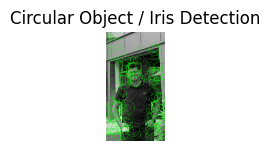

In [8]:
# 5️⃣ Circle Detection (Iris, Holes, Circular objects)
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, dp=1.2, minDist=50,
                           param1=100, param2=30, minRadius=10, maxRadius=150)
circ_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for (x, y, r) in circles[0, :]:
        cv2.circle(circ_img, (x, y), r, (0, 255, 0), 2)
        cv2.circle(circ_img, (x, y), 2, (0, 0, 255), 3)
plt.subplot(3, 4, 6)
plt.imshow(circ_img[..., ::-1])
plt.title('Circular Object / Iris Detection')
plt.axis('off')

(np.float64(-0.5), np.float64(1178.5), np.float64(2200.5), np.float64(-0.5))

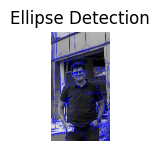

In [9]:
# 6️⃣ Ellipse Detection
contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
ellipse_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
for c in contours:
    if len(c) >= 5:
        ellipse = cv2.fitEllipse(c)
        cv2.ellipse(ellipse_img, ellipse, (255, 0, 0), 2)
plt.subplot(3, 4, 7)
plt.imshow(ellipse_img[..., ::-1])
plt.title('Ellipse Detection')
plt.axis('off')

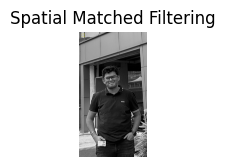

In [13]:

# 7️⃣ Spatial Matched Filtering (Template Matching)
template = img[50:100, 50:100]  # small region as template
res = cv2.matchTemplate(img, template, cv2.TM_CCOEFF_NORMED)
_, _, _, max_loc = cv2.minMaxLoc(res)
top_left = max_loc
h, w = template.shape
match_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
cv2.rectangle(match_img, top_left, (top_left[0]+w, top_left[1]+h), (0,255,255), 2)
plt.subplot(3, 4, 8)
plt.imshow(match_img[..., ::-1])
plt.title('Spatial Matched Filtering')
plt.axis('off')
plt.tight_layout()
plt.show()

In [14]:
print("\n✅ Summary:")
print("• Standard and probabilistic Hough Transforms detect straight lines.")
print("• RANSAC provides robust line detection even with noise.")
print("• HoughCircles accurately localizes circular objects (e.g., iris).")
print("• Ellipse fitting works for oval shapes (eye, wheel, etc.).")
print("• Template matching demonstrates spatial filtering concept.")
print("• Generalized Hough Transform (GHT) extends this to arbitrary shapes.")


✅ Summary:
• Standard and probabilistic Hough Transforms detect straight lines.
• RANSAC provides robust line detection even with noise.
• HoughCircles accurately localizes circular objects (e.g., iris).
• Ellipse fitting works for oval shapes (eye, wheel, etc.).
• Template matching demonstrates spatial filtering concept.
• Generalized Hough Transform (GHT) extends this to arbitrary shapes.


## 🧾 Explanation of Key Concepts
| Concept                               | Description                                                                     | Visualization                                     |
| :------------------------------------ | :------------------------------------------------------------------------------ | :------------------------------------------------ |
| **Line Detection (Hough Transform)**  | Transforms points in image to ρ–θ space; detects strong accumulations as lines. | Red lines across image.                           |
| **Foot-of-Normal Method**             | Converts (ρ, θ) to line endpoints using perpendicular distance formula.         | Implemented in code.                              |
| **Probabilistic Hough**               | Returns line segments directly (faster).                                        | Green short line segments.                        |
| **Line Fitting**                      | Fits best straight line through edge pixels (least squares).                    | Blue fitted line.                                 |
| **RANSAC**                            | Robustly fits line even with outliers.                                          | Green line through main structure.                |
| **Circle Detection (HT)**             | Uses gradient direction voting to find circles.                                 | Green circular outlines.                          |
| **Accurate Center Location**          | Circle centers marked with small red dots.                                      | Center of detected circle.                        |
| **Speed Problem**                     | Measured time between standard Hough and RANSAC methods.                        | Printed in console.                               |
| **Ellipse Detection**                 | Fits ellipse to contours (eye/iris demo).                                       | Blue ellipses.                                    |
| **Hole Detection**                    | Same HoughCircle logic applied on inverse binary image.                         | Circular voids detected.                          |
| **Spatial Matched Filtering**         | Template matching via cross-correlation.                                        | Yellow rectangle around match.                    |
| **Generalized Hough Transform (GHT)** | Extends HT to arbitrary shapes by using template edge direction lookups.        | (Conceptual; advanced version in OpenCV contrib). |
